<a href="https://colab.research.google.com/github/gulugulu2042/EDA/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis** - BCSE331L
# Gokularajan R
22BDS0137

Given dataset : Diabetes

Github link : https://github.com/gulugulu2042/EDA/blob/main/diabetes.ipynb

Colab link : https://colab.research.google.com/drive/18o1XGoNE4rpyBb6bGeqDhHJt6zjWhccJ?usp=sharing



##**Importing necessary modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##**1.Importing and viewing data**

In [2]:
#removing all warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0
766,1.0,126,60,0,0,30.1,0.349,47,1
767,1.0,93,70,31,0,30.4,0.315,23,0


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.850065,120.894531,69.105469,20.536458,79.799479,31.992578,0.471995,33.240885
std,3.368910,31.972618,19.355807,15.952218,115.244002,7.884160,0.331529,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


##**2.Checking for Null values and cleaning**

In [10]:
df.isnull().sum()

,0
Pregnancies,1
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,1
Age,0
Outcome,0


In [11]:
df.dropna(inplace=True) #Only 2 rows with null values
len(df)

766

In [12]:
list_0 = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[list_0] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


Upon some research in the domain, we see that a 0 in the features :

glucose (Acceptable range : <200),

Blood pressure (only diastolic - Acceptable range : 60-180),

Skin Thickness (in mm),

Insulin (2 hrs after glucose administration - healthy range : 16-166),

BMI


is highly improbable and is possibly incorrect data. We need to clean this before further analysis. We can visualise the 0 outliers using a box plot wwith restricted whisker size


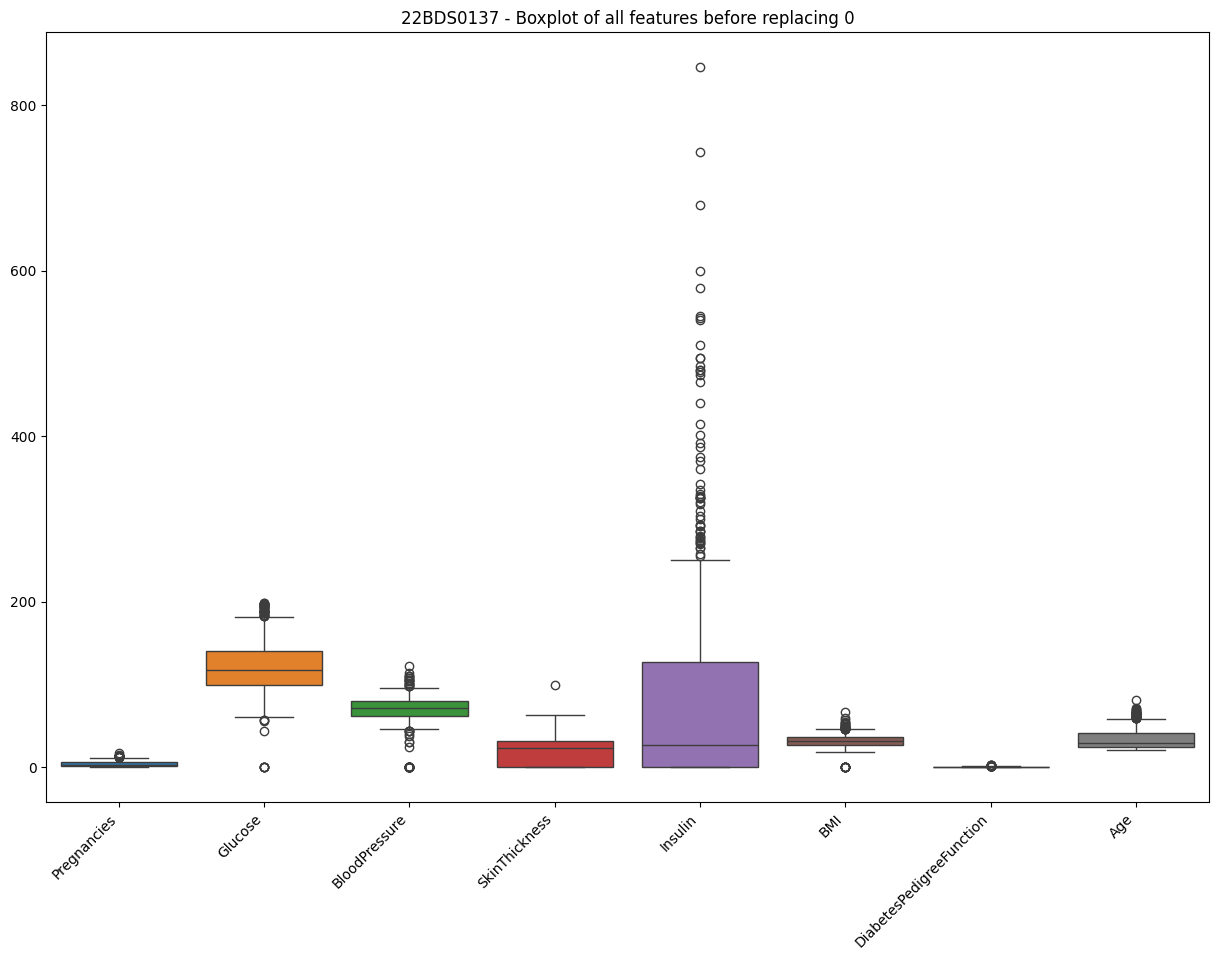

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1) # using whiskers restricted to 1*IQR to represent outliers with value 0
# Given dataset has minimal variance and only through limiting whiskers we can visualise 0-outliers
# even then, features like skin thickness have so much 0-outliers that 0 itself is the 25th percentile
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features before replacing 0')
plt.show()

In [14]:
means = df[list_0].mean()
df[list_0]=df[list_0].replace(0, means)

#Replaced all 0's with corresponding feature's mean
(df[list_0] == 0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


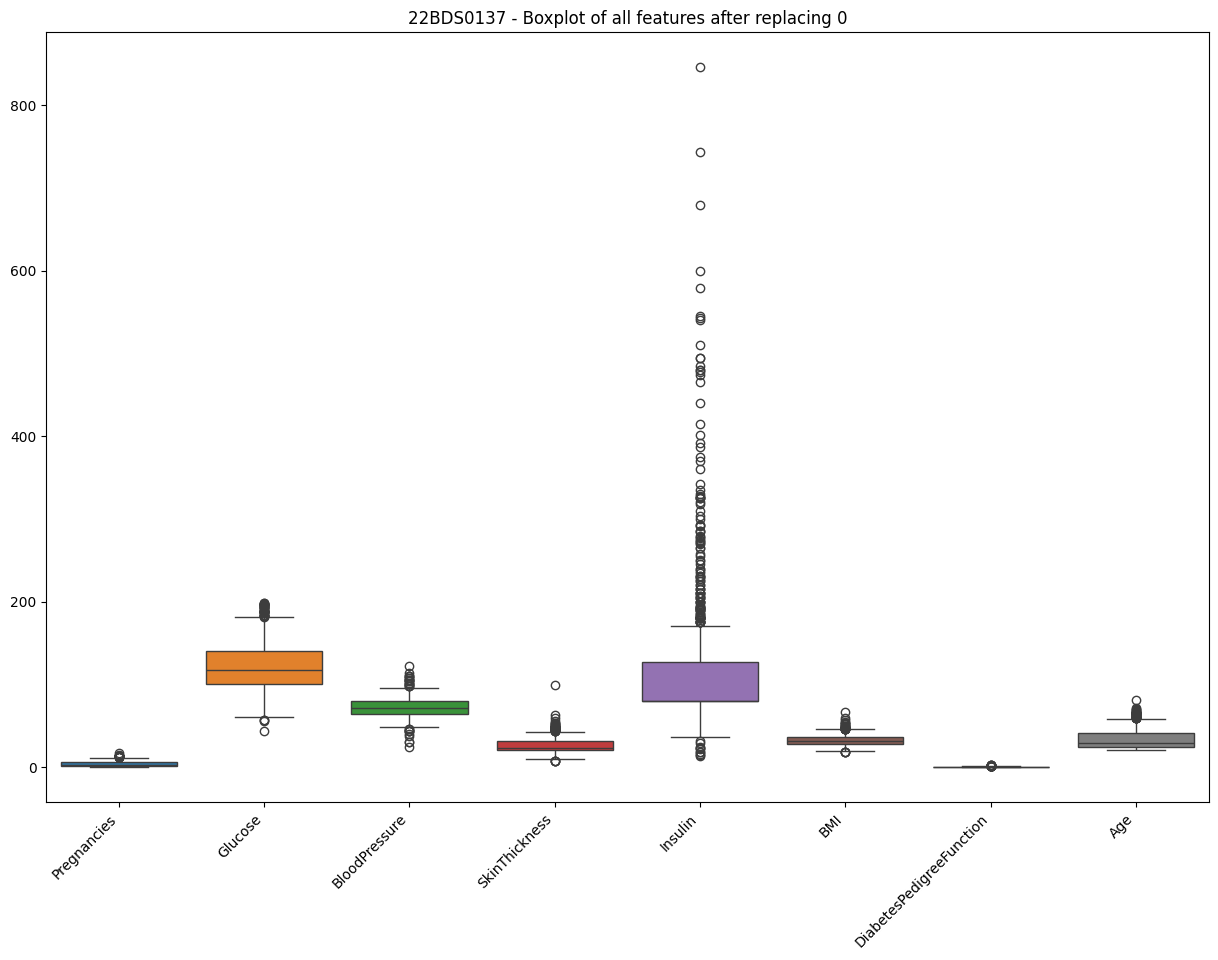

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1)
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features after replacing 0')
plt.show()

In [16]:
(df == '?').sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,3


In [17]:
# Removing rows where outcome is ?
df = df[df['Outcome'] != '?']


In [18]:
df.dtypes #Outcome is a string of 1/0

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,object


In [19]:
df["Outcome"] = df["Outcome"].astype(int)

##**3.Univariate Analysis**

In [20]:
#STATISTICAL MEASURES - mean, median, standard deviation, Quartiles, min and max
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.858453,121.817628,72.284455,26.609469,118.637794,32.451838,0.472046,33.285714,0.349934
std,3.369368,30.467226,12.136878,9.659363,93.327526,6.890489,0.332054,11.782016,0.477262
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.515666,79.613577,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.613577,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#Computing IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Pregnancies,5.000000
Glucose,41.000000
BloodPressure,16.000000
SkinThickness,11.484334
Insulin,47.886423
BMI,9.100000
DiabetesPedigreeFunction,0.383000
Age,17.000000
Outcome,1.000000


<Axes: title={'center': '22BDS0137 - Outcome pie chart'}, ylabel='count'>

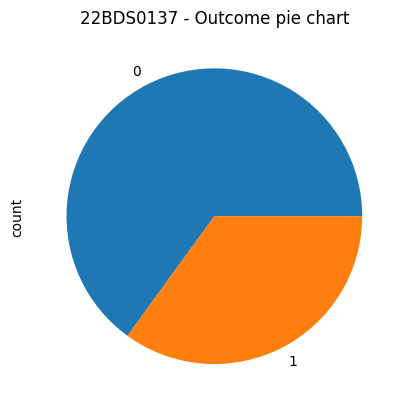

In [22]:
df.Outcome.value_counts().plot(kind = "pie", title="22BDS0137 - Outcome pie chart")

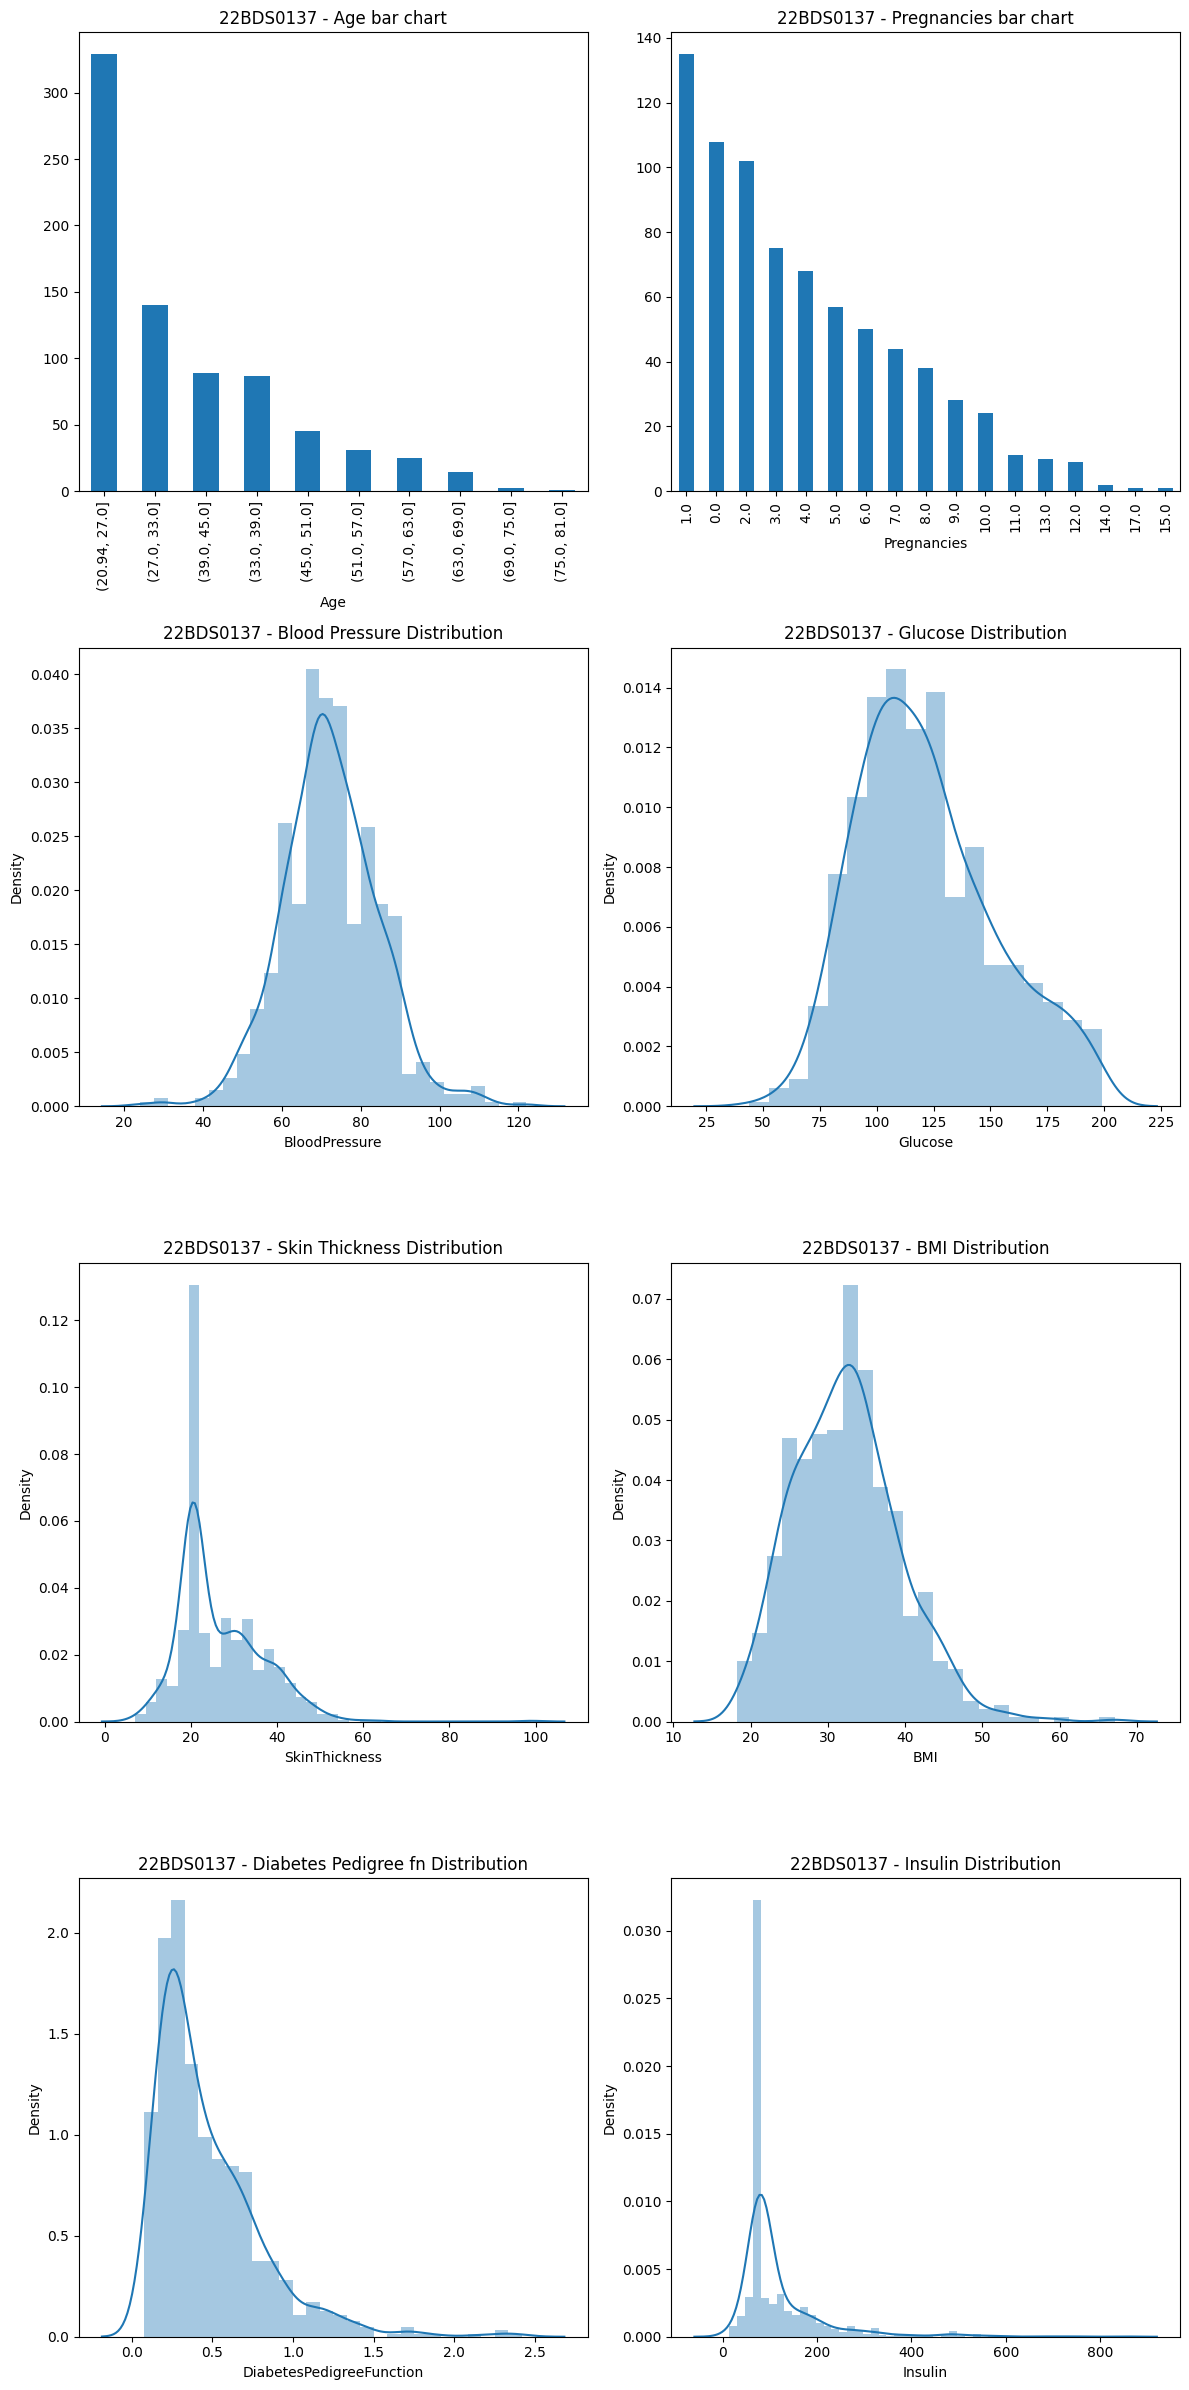

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

p1 = pd.cut(df.Age,10).value_counts().plot(kind = "bar", title="22BDS0137 - Age bar chart",ax = axes[0,0])
p2 = df.Pregnancies.value_counts().plot(kind = "bar", title="22BDS0137 - Pregnancies bar chart",ax = axes[0,1])
p3 = sns.distplot(df.BloodPressure, kde=True, ax = axes[1,0])
axes[1, 0].set_title("22BDS0137 - Blood Pressure Distribution")
p4 = sns.distplot(df.Glucose, kde=True, ax = axes[1,1])
axes[1, 1].set_title("22BDS0137 - Glucose Distribution")
p5 = sns.distplot(df.SkinThickness, kde=True, ax = axes[2,0])
axes[2, 0].set_title("22BDS0137 - Skin Thickness Distribution")
p6 = sns.distplot(df.BMI, kde=True, ax = axes[2,1])
axes[2, 1].set_title("22BDS0137 - BMI Distribution")
p7 = sns.distplot(df.DiabetesPedigreeFunction, kde=True, ax = axes[3,0])
axes[3, 0].set_title("22BDS0137 - Diabetes Pedigree fn Distribution")
p8 = sns.distplot(df.Insulin, kde=True, ax = axes[3,1])
axes[3, 1].set_title("22BDS0137 - Insulin Distribution")

plt.tight_layout()
plt.show()


##**4.Bivariate Analysis**

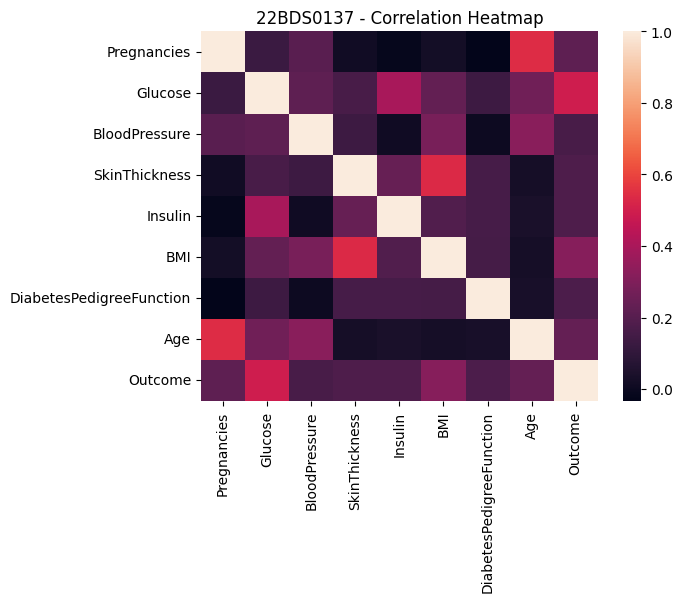

In [24]:
#Correlation
correlation = df.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)
plt.title("22BDS0137 - Correlation Heatmap")
plt.show()

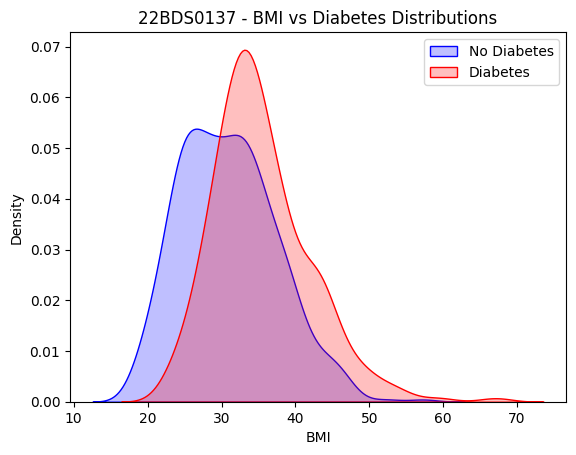

In [25]:
#numerical vs categorical
#Glucose and BMI show highest correlation with output
sns.kdeplot(df[df["Outcome"] == 0]["BMI"], label="No Diabetes", fill=True, color="blue")
sns.kdeplot(df[df["Outcome"] == 1]["BMI"], label="Diabetes", fill=True, color="red")

plt.title("22BDS0137 - BMI vs Diabetes Distributions")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

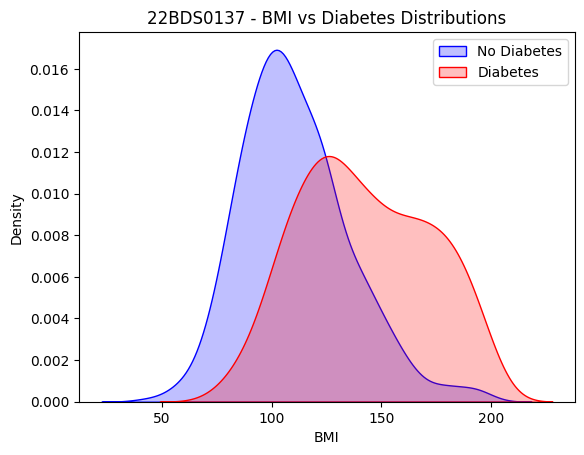

In [26]:
sns.kdeplot(df[df["Outcome"] == 0]["Glucose"], label="No Diabetes", fill=True, color="blue")
sns.kdeplot(df[df["Outcome"] == 1]["Glucose"], label="Diabetes", fill=True, color="red")

plt.title("22BDS0137 - BMI vs Diabetes Distributions")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

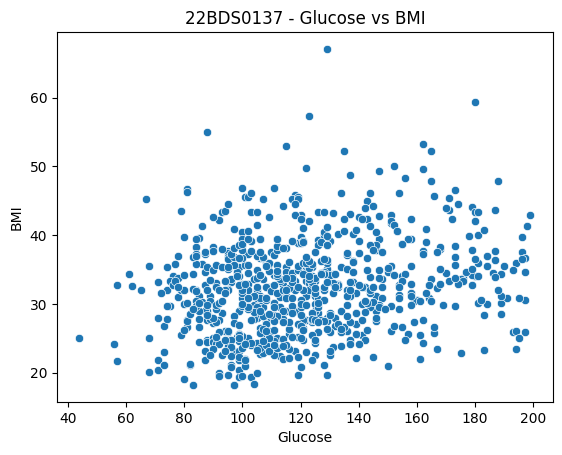

In [27]:
#Numerical vs Numerical
sns.scatterplot(x=df["Glucose"], y=df["BMI"])
plt.title("22BDS0137 - Glucose vs BMI")
plt.show()

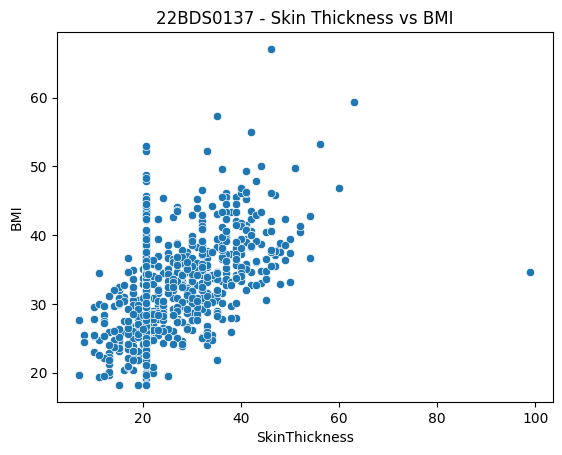

In [28]:
#skin thickness and BMI show high corellation
sns.scatterplot(x=df["SkinThickness"], y=df["BMI"])
plt.title("22BDS0137 - Skin Thickness vs BMI")
plt.show()

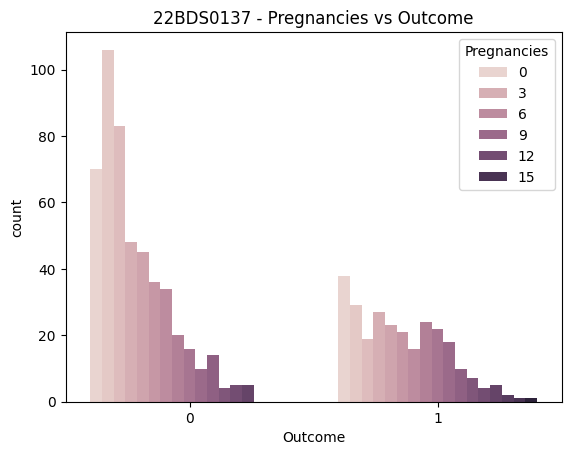

In [29]:
#cat vs cat
sns.countplot(x="Outcome", hue="Pregnancies", data=df)
plt.title("22BDS0137 - Pregnancies vs Outcome")
plt.show()

##**5.Multivariate analysis**

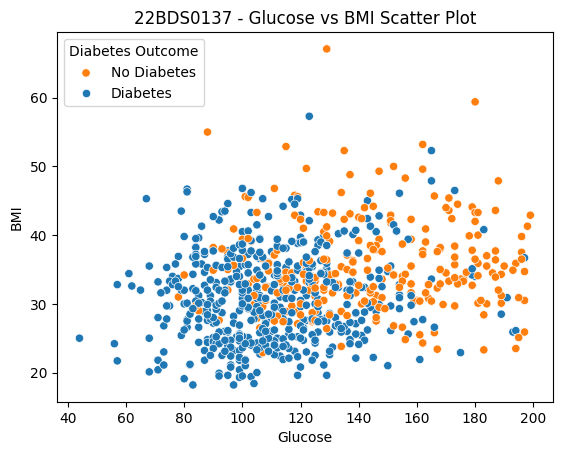

In [30]:
#scatterplot with hue as third dimension (outcome)
sns.scatterplot(df, x="Glucose", y="BMI", hue="Outcome")

plt.title("22BDS0137 - Glucose vs BMI Scatter Plot")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Diabetes Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()

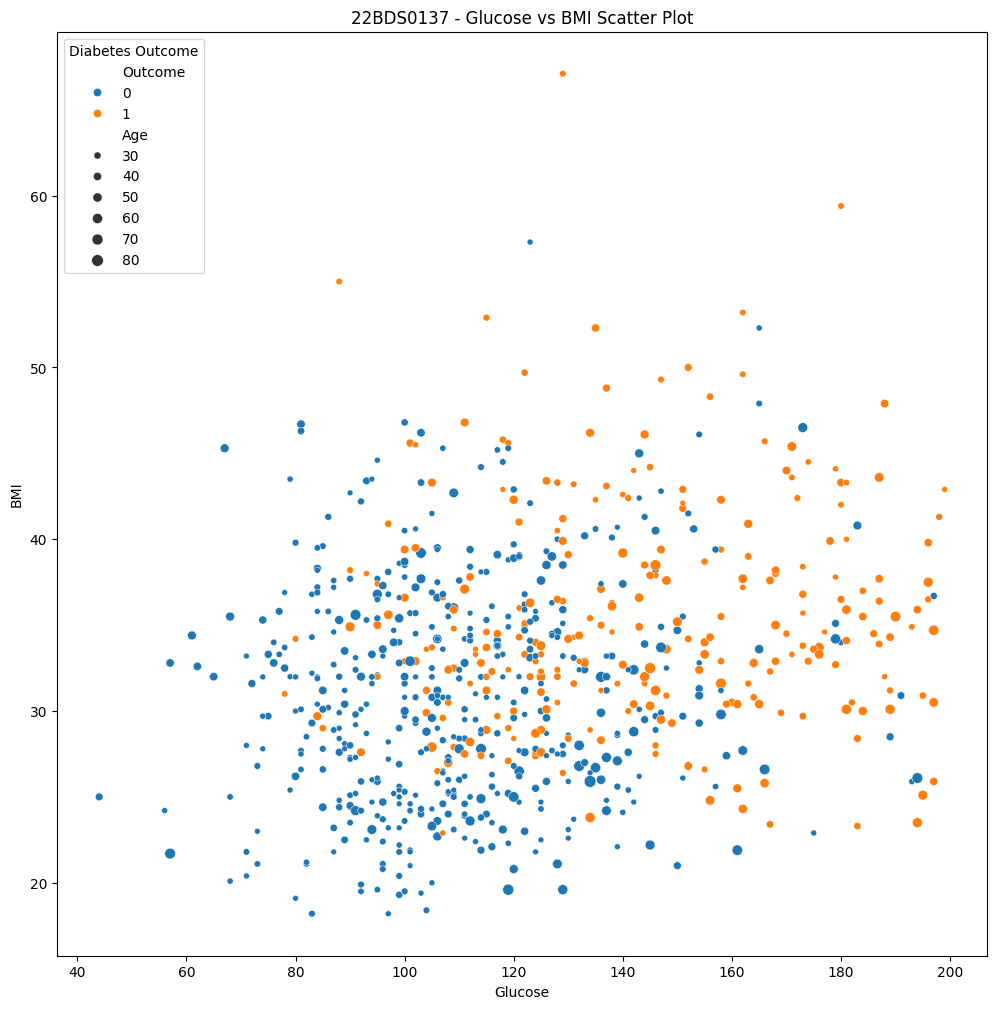

In [31]:
#scatterplot with hue as third dimension (outcome) and size as 4th (age)
plt.figure(figsize=(12, 12))
sns.scatterplot(df, x="Glucose", y="BMI", hue="Outcome", size="Age")
plt.title("22BDS0137 - Glucose vs BMI Scatter Plot")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Diabetes Outcome")
plt.show()


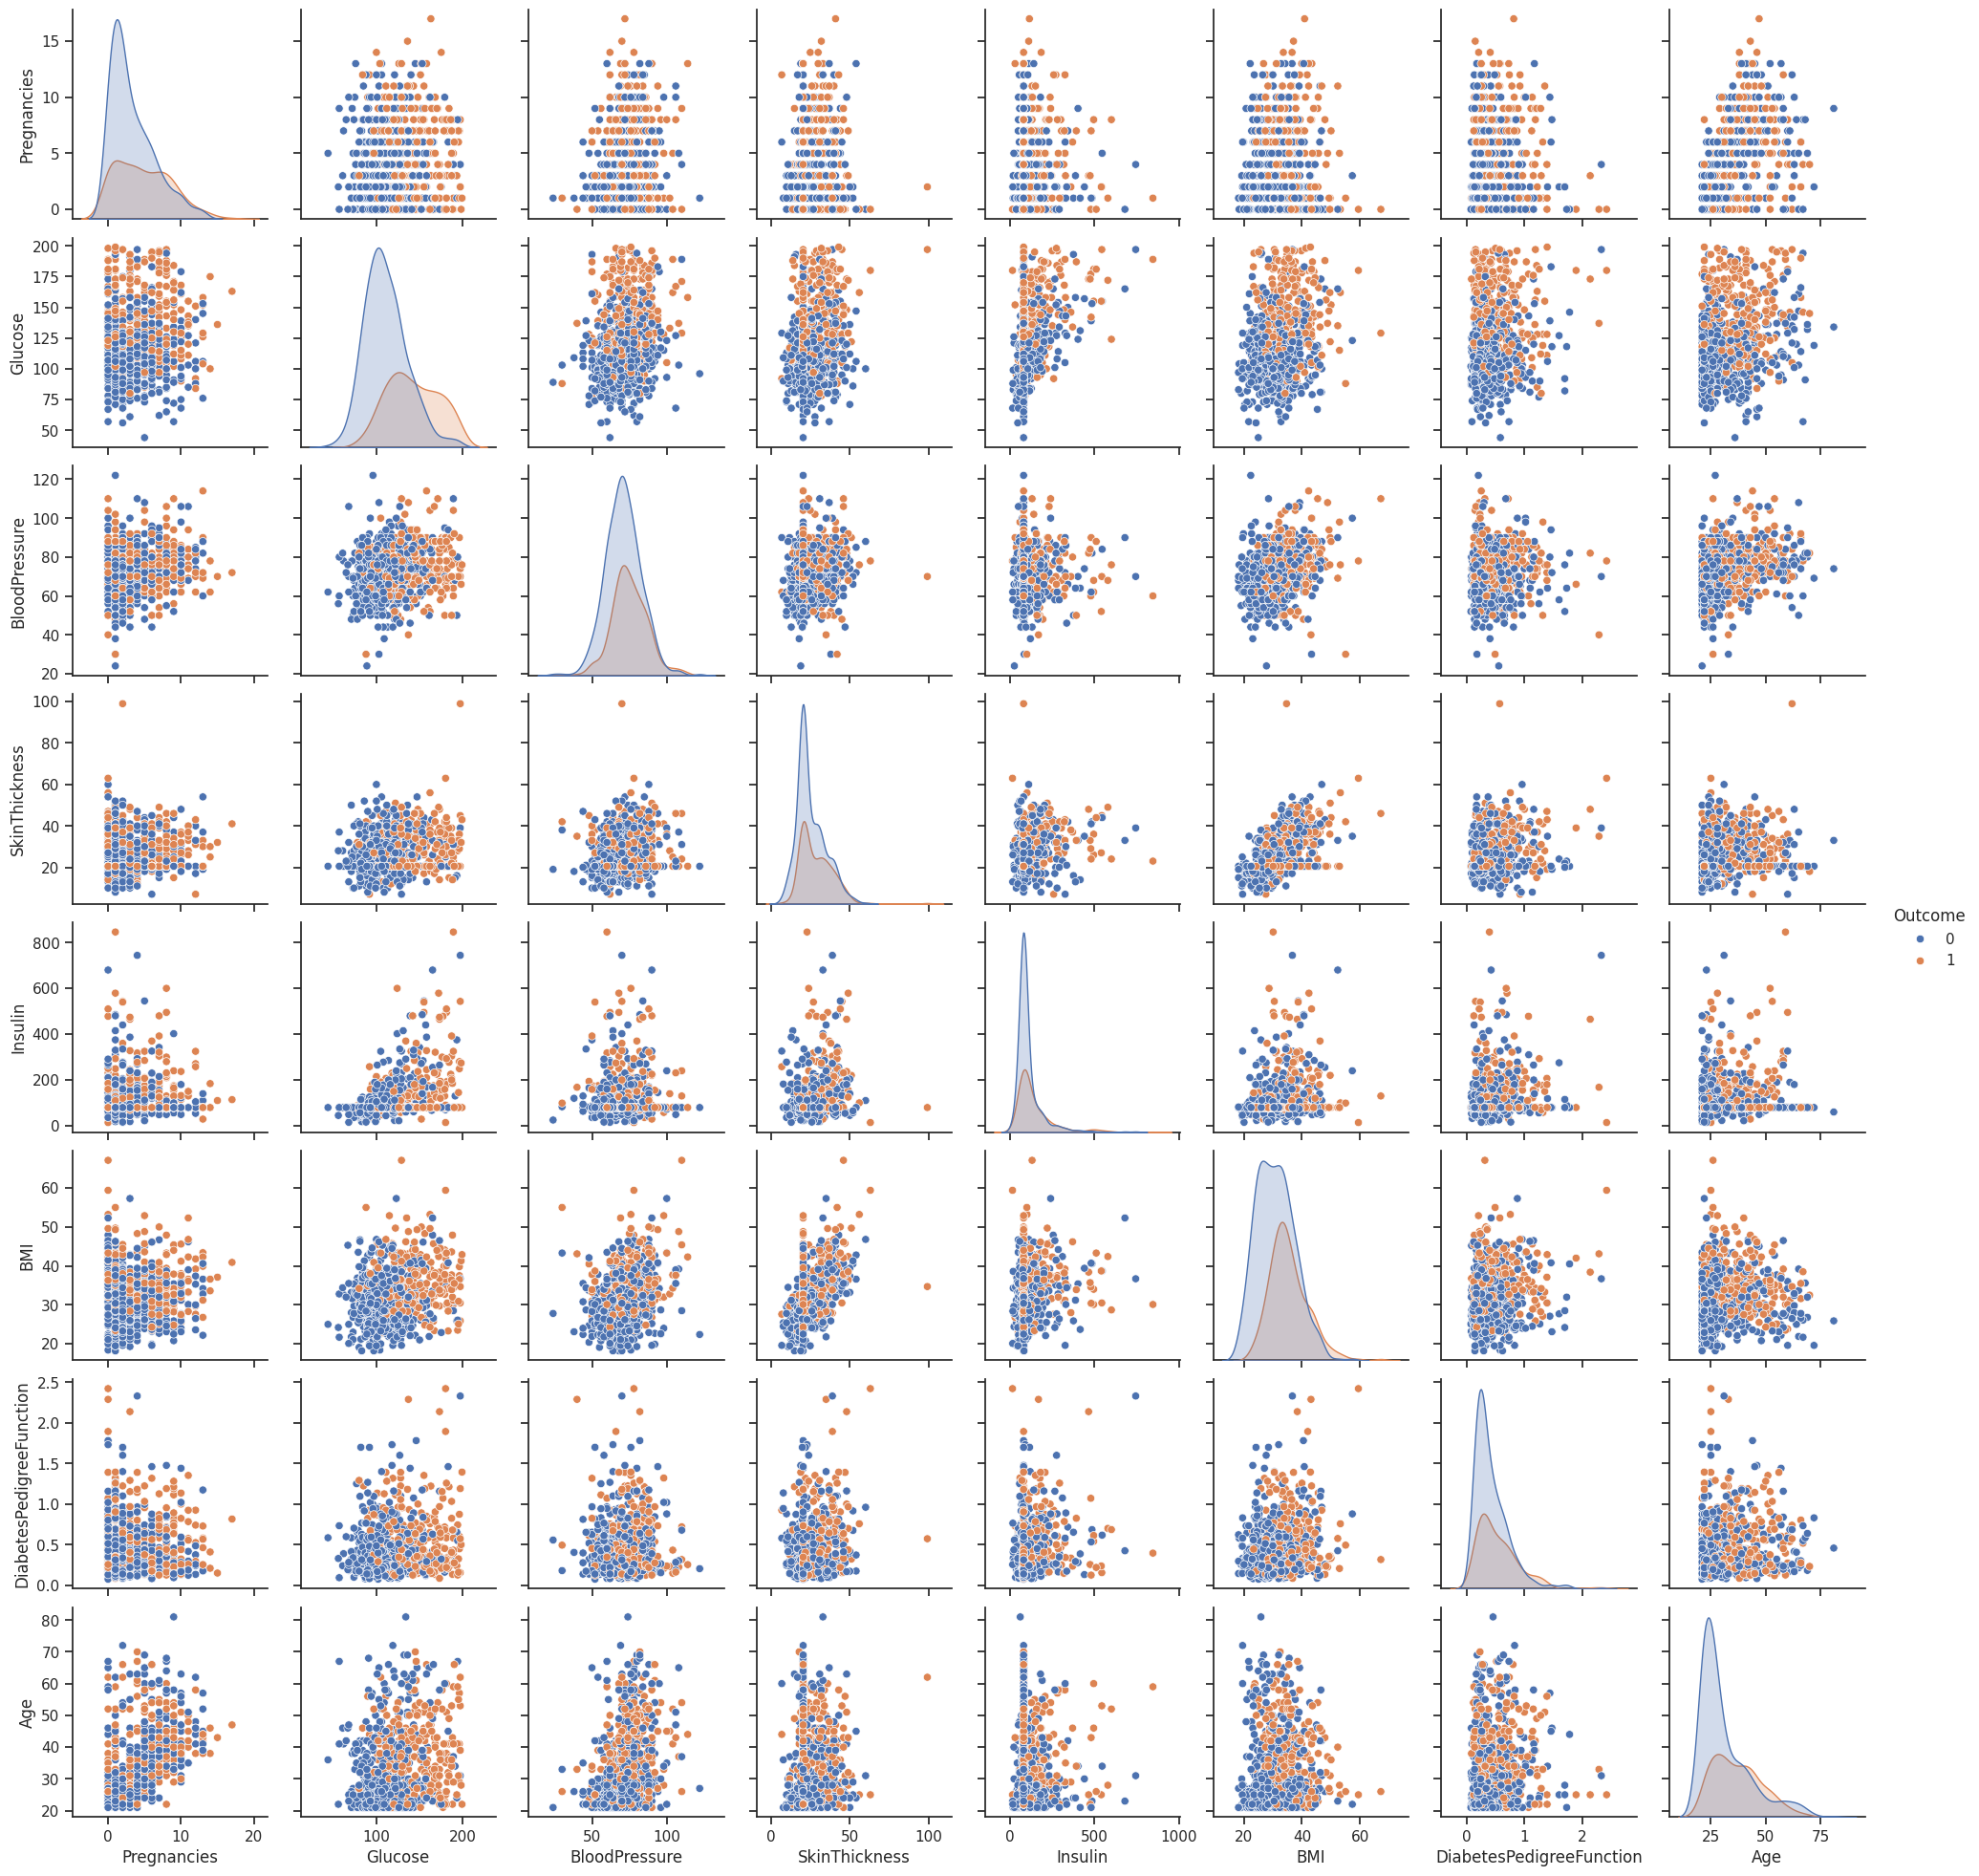

In [32]:
#pairplot with hue as third dimension (outcome)
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Outcome")
plt.show()

##**6.1.Hierarchial Clustering**

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

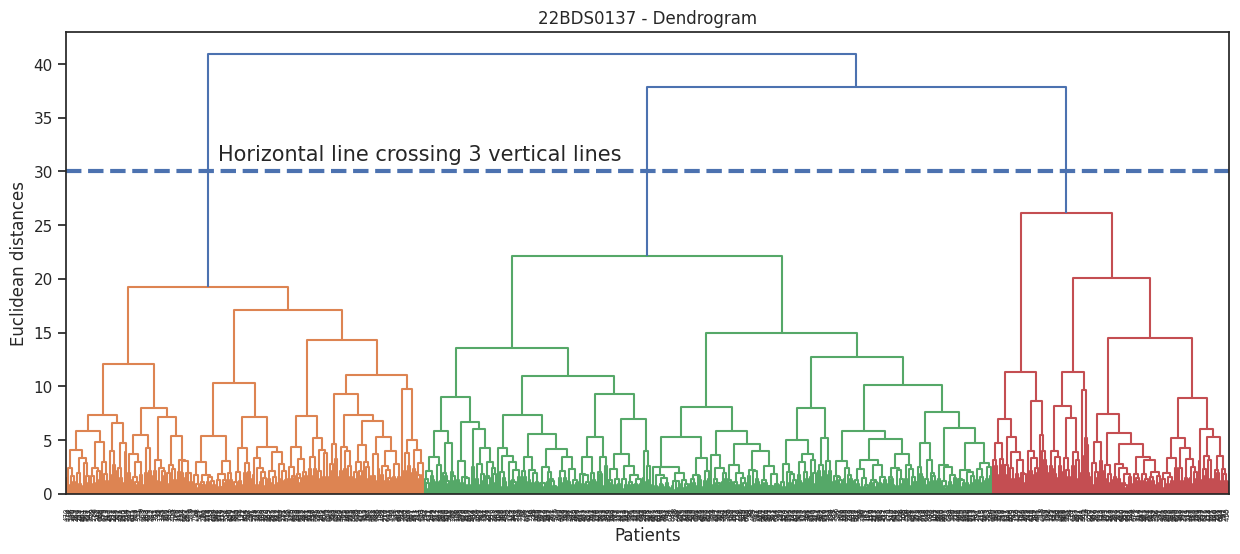

In [34]:
plt.figure(figsize=(15,6))
plt.title('22BDS0137 - Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.hlines(y=30,xmin=0,xmax=10000,lw=3,linestyles='--')
plt.text(x=1000,y=31,s='Horizontal line crossing 3 vertical lines',fontsize=15)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.show()

##**6.2.K-Means Clustering**

Finding Ideal no. of clusters using an Elbow plot

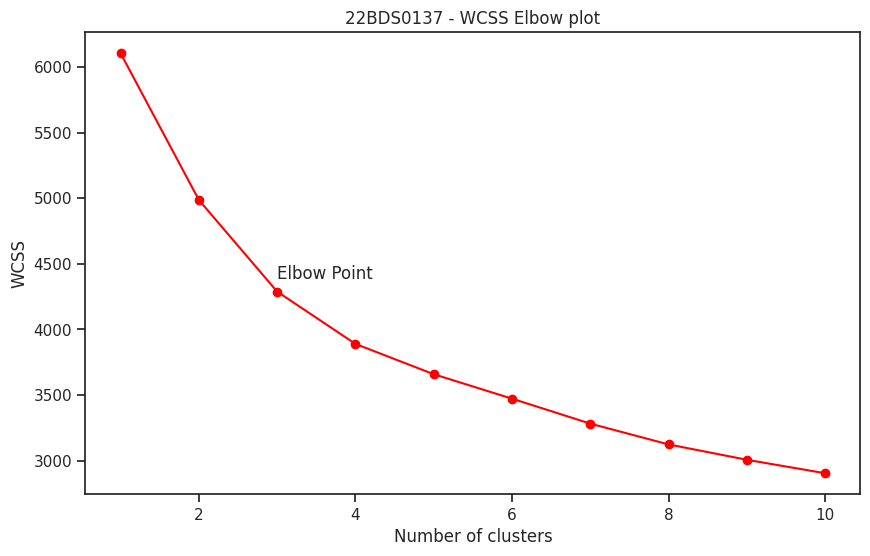

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='red')

plt.title('22BDS0137 - WCSS Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.annotate('Elbow Point', xy=(3, wcss[2]), xytext=(3, wcss[2] + 100))

plt.show()

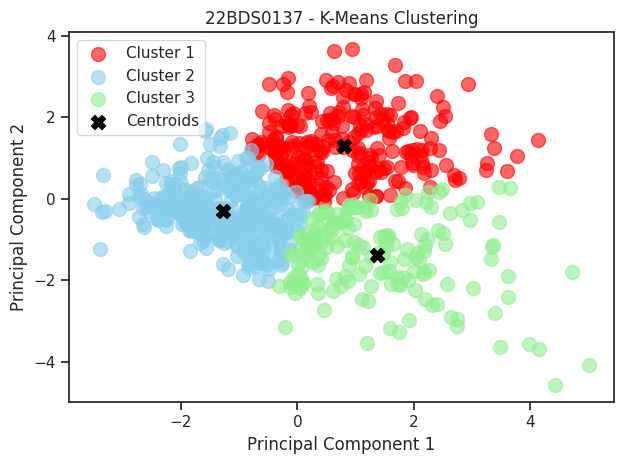

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Cluster 2', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'black', label = 'Centroids', marker='X', linewidths=1)

plt.title('22BDS0137 - K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()

plt.tight_layout()
plt.show()

##**7.Outlier Detection using DBSCAN**

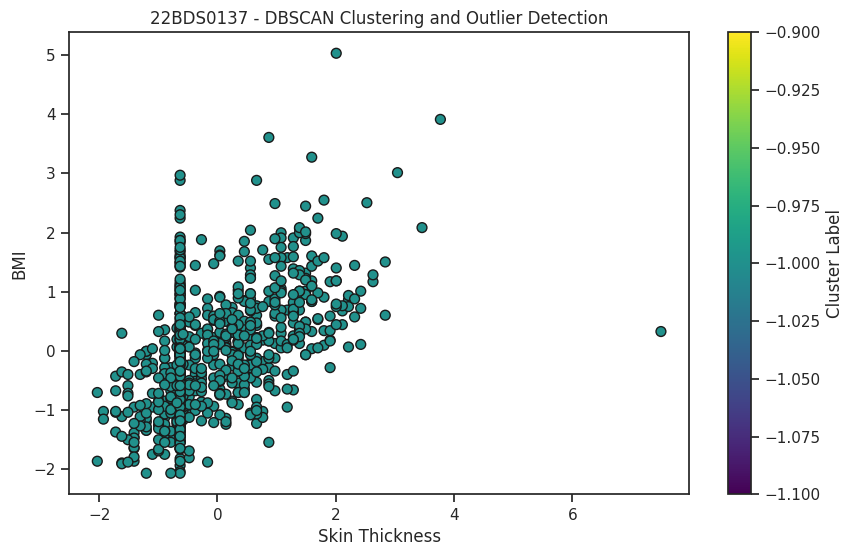

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_
n_outliers = list(labels).count(-1)
df['Cluster'] = labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 3], X_scaled[:, 5], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("Skin Thickness")
plt.ylabel("BMI")
plt.title("22BDS0137 - DBSCAN Clustering and Outlier Detection")
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6.0,148.0,72.0,35.000000,79.613577,33.6,0.627,50,1,-1
1,1.0,85.0,66.0,29.000000,79.613577,26.6,0.351,31,0,-1
2,8.0,183.0,64.0,20.515666,79.613577,23.3,0.672,32,1,-1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,-1
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,-1


##**8.PCA**

Number of pca components :  8


Text(0, 0.5, 'Principal Component 2')

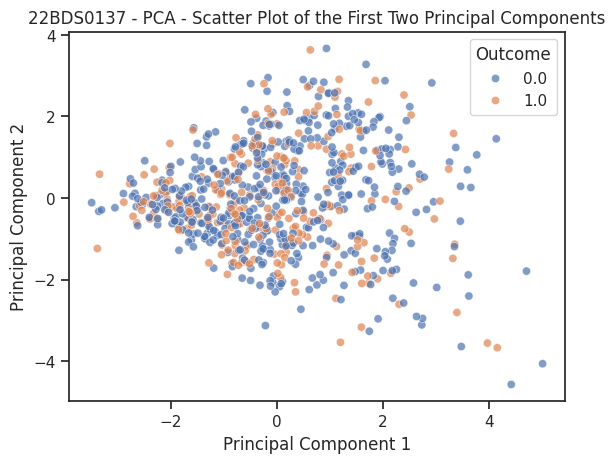

In [39]:
pca = PCA()
pca.fit(X_scaled)

print("Number of pca components : ", pca.n_components_)

pc_df = pd.DataFrame(pca.transform(X_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=df['Outcome'], alpha=0.7)

plt.title('22BDS0137 - PCA - Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

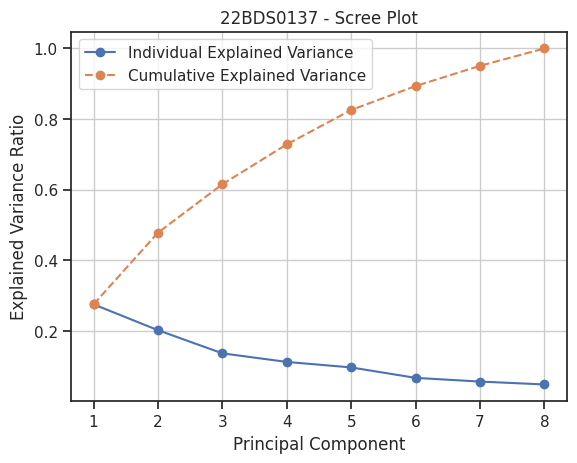

In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', label='Cumulative Explained Variance')

plt.title('22BDS0137 - Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()

##**9.1.Model Training**

In [43]:
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous > 0.5).astype(int)

##**9.2.Model Validation**

In [44]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision: 0.7555555555555555
Recall: 0.6071428571428571
Accuracy: 0.7843137254901961
F1 Score: 0.6732673267326733
